In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


#### Upvote if you like the work.

# Drug Classification

## Importing libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
# reading the file using pandas

drug_df = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# General info about dataset
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


* **Age**: Age of the patient
* **Sex**: Gender of the patients
* **BP**: Blood Pressure of the patient
* **Cholesterol**: Cholesterol of the patient
* **Na_to_K**: Sodium to Potassium ratio in patient's blood
* **Drug**: Drug type give to patients

# EDA and Visualizations

## Age

<AxesSubplot:title={'center':'AGE DISTRIBUTION'}, ylabel='Density'>

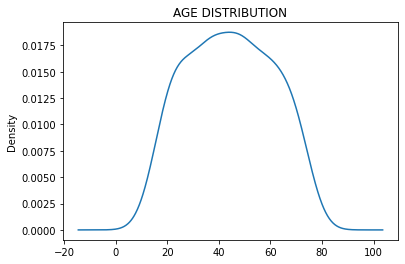

In [5]:
plt.title("AGE DISTRIBUTION")
drug_df['Age'].plot(kind='kde')

In [6]:
print(f"Mean age is {drug_df['Age'].mean()}")

Mean age is 44.315


## Gender

<AxesSubplot:title={'center':'Gender Distribution'}, xlabel='Sex', ylabel='count'>

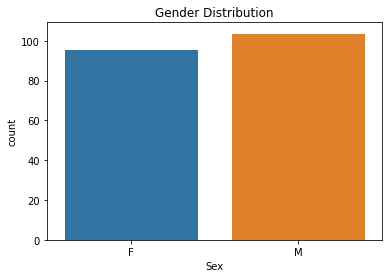

In [7]:
plt.title("Gender Distribution")
sns.set_style("darkgrid")
sns.countplot(x=drug_df.Sex)

In [8]:
print("We can see that there is almost an equal distribution of male and female.")

We can see that there is almost an equal distribution of male and female.


## Drug

In [9]:
drug_df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

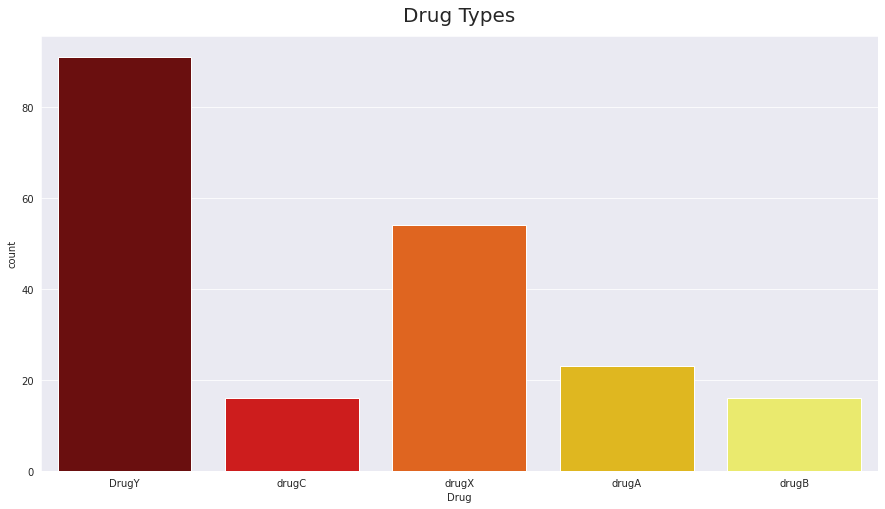

In [10]:
plt.figure(figsize=(15,8))
plt.title("Drug Types", fontsize=20, y=1.02)
sns.countplot(x = drug_df.Drug, palette="hot")
plt.show()

In [11]:
print("Drug Y is most commonly used and Drug C is least commonly used")

Drug Y is most commonly used and Drug C is least commonly used


<AxesSubplot:xlabel='Drug', ylabel='Age'>

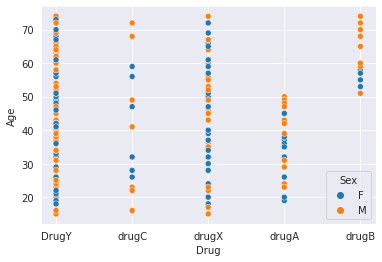

In [12]:
sns.scatterplot(x='Drug',y='Age',hue='Sex',data=drug_df)

In [13]:
print("We find that Drug B is used by people over age 50 and drug A is used by people under 50")

We find that Drug B is used by people over age 50 and drug A is used by people under 50


## BloodPressure

<AxesSubplot:title={'center':'Blood Pressure'}, xlabel='BP', ylabel='count'>

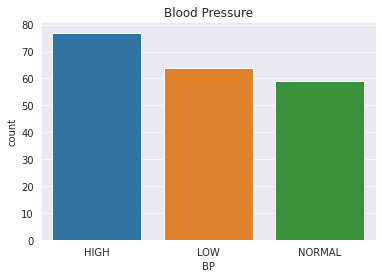

In [14]:
plt.title("Blood Pressure")
sns.countplot(x=drug_df.BP)

<AxesSubplot:xlabel='Drug', ylabel='count'>

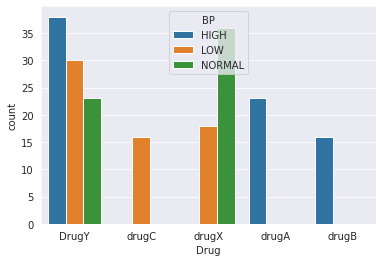

In [15]:
sns.countplot(x='Drug',hue='BP',data = drug_df)

* Drug B and Drug A is only used by people with high cholestrol
* Drug C is only used by people with low cholestrol

## Na_to_K

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

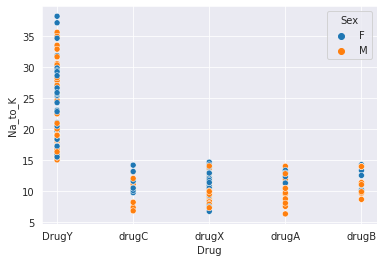

In [16]:
sns.scatterplot(x='Drug',y="Na_to_K",hue='Sex',data=drug_df)

* Drug Y is used by people with Na_to_K ratio greater than 15

# Categroical columns

In [17]:
drug_df['Sex'] = drug_df['Sex'].map({'M': 1, 'F': 2})
drug_df['BP'] = drug_df['BP'].map({'HIGH': 1, "NORMAL" : 2, "LOW" : 3})
drug_df['Cholesterol'] = drug_df['Cholesterol'].map({'HIGH': 1, "NORMAL" : 2})
drug_df["Drug"] = drug_df["Drug"].map({"DrugY":1, "drugC":2, "drugX":3, "drugA":4, "drugB":5})

In [18]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,1,25.355,1
1,47,1,3,1,13.093,2
2,47,1,3,1,10.114,2
3,28,2,2,1,7.798,3
4,61,2,3,1,18.043,1


## Splitting the data into training and test datasets

In [19]:
X = drug_df.drop('Drug',axis=1)
y = drug_df['Drug']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
len(X_train),len(X_test)

(160, 40)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [23]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
print(f"Accuracy score for logistic regression model is {model.score(X_test,y_test)*100}")

Accuracy score for logistic regression model is 92.5


<AxesSubplot:>

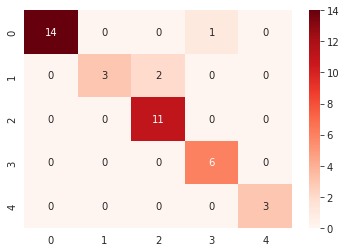

In [25]:
# Plotting the confusion matrix for this model
predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

In [26]:
# Classification report for Logistic Regression
from sklearn import metrics
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      0.60      0.75         5
           3       0.85      1.00      0.92        11
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         3

    accuracy                           0.93        40
   macro avg       0.94      0.91      0.91        40
weighted avg       0.94      0.93      0.92        40



# Random Forest Classifier

In [27]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
print(f"Accuracy score for Random Forest model is {model.score(X_test,y_test)*100}")

Accuracy score for Random Forest model is 100.0


<AxesSubplot:>

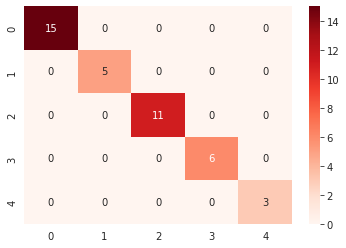

In [29]:
# Plotting the confusion matrix for this model
predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

In [30]:
# Classification report for Random Forest
from sklearn import metrics
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# Decision Tree Classifier

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
print(f"Accuracy score for Decision Tree Classifier is {model.score(X_test,y_test)*100}")

Accuracy score for Decision Tree Classifier is 100.0


<AxesSubplot:>

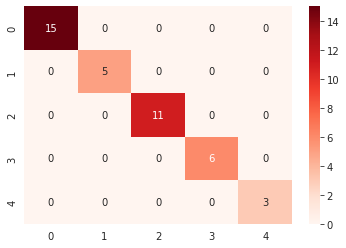

In [33]:
# Plotting the confusion matrix for this model
predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

In [34]:
# Classification report for Decision Tree Classifier
from sklearn import metrics
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# KNN with cross validation

In [35]:
scores = {}

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X,y,cv=5)
scores['Knn']= np.mean(cv_scores)
print(f"KNN Score : {np.mean(cv_scores)}")


KNN Score : 0.7100000000000001


# SVM Classifier

In [37]:
#### To find best score of SVM model, I will try different value of C, kernel, degree and gamma parameters. The easy way to do this is GridSearchCV method.

### Default parameters

In [38]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
accuracies = cross_val_score(svc, X,y ,cv=5)
print(f"Accuracies : {np.mean(accuracies)}")



Accuracies : 0.7


#### Grid Search CV

In [39]:
from sklearn.model_selection import GridSearchCV
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

Best Parameters: {'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.96875
Test Score: 1.0


## UPVOTE